In [58]:
# import required libraries
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import accuracy_score
from skimage import io
import math

In [2]:
# load and read dataset
dataset = pd.read_excel('dataset.xlsx')
dataset.head()

,Red_Mean,Red_Median,Red_Var,Red_Std,Green_Mean,Green_Median,Green_Var,Green_Std,Blue_Mean,Blue_Median,Blue_Var,Blue_Std,Label
0,241.118877,255,2456.282586,49.560898,238.801472,253,2538.909422,50.387592,238.518423,253,2528.150507,50.280717,1
1,243.519280,255,1907.925583,43.679807,241.190525,254,1996.078722,44.677497,240.883254,253,1985.555379,44.559571,0
2,243.190279,255,1985.340639,44.557161,240.862863,254,2072.190197,45.521316,240.567514,253,2062.231349,45.411797,0
3,243.290183,255,1961.891869,44.293249,240.958340,254,2050.420515,45.281569,240.655986,253,2039.198265,45.157483,0
4,244.942210,255,1663.941151,40.791435,241.237157,252,1742.343735,41.741391,243.074659,255,1740.738547,41.722159,0


In [3]:
# length of dataset
len(dataset)

517

In [4]:
# find descriptive statistics about dataset
dataset.describe()

,Red_Mean,Red_Median,Red_Var,Red_Std,Green_Mean,Green_Median,Green_Var,Green_Std,Blue_Mean,Blue_Median,Blue_Var,Blue_Std,Label
count,517.000000,517.0,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,242.789326,255.0,2085.194165,45.598539,240.292460,253.636364,2169.454268,46.516074,240.264987,253.255319,2160.333189,46.418220,0.450677
std,1.045446,0.0,228.950726,2.445186,0.976990,0.698332,228.079825,2.391696,1.147703,0.668067,227.196048,2.386017,0.498043
min,237.615951,255.0,1663.941151,40.791435,235.314631,252.000000,1742.343735,41.741391,235.065980,253.000000,1740.738547,41.722159,0.000000
25%,242.221739,255.0,1927.098013,43.898725,239.809942,254.000000,2012.342717,44.859143,239.620787,253.000000,2003.568630,44.761240,0.000000
50%,242.969552,255.0,2040.289239,45.169561,240.499195,254.000000,2125.855474,46.107000,240.380366,253.000000,2115.514412,45.994722,0.000000
75%,243.456685,255.0,2206.532157,46.973739,240.965034,254.000000,2291.731983,47.872038,240.886957,253.000000,2282.115288,47.771490,1.000000
max,244.942210,255.0,3233.498672,56.863861,241.661304,254.000000,3311.488264,57.545532,243.074659,255.000000,3299.335787,57.439845,1.000000


In [5]:
# find further information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Red_Mean      517 non-null    float64
 1   Red_Median    517 non-null    int64  
 2   Red_Var       517 non-null    float64
 3   Red_Std       517 non-null    float64
 4   Green_Mean    517 non-null    float64
 5   Green_Median  517 non-null    int64  
 6   Green_Var     517 non-null    float64
 7   Green_Std     517 non-null    float64
 8   Blue_Mean     517 non-null    float64
 9   Blue_Median   517 non-null    int64  
 10  Blue_Var      517 non-null    float64
 11  Blue_Std      517 non-null    float64
 12  Label         517 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 52.6 KB


In [6]:
# find correlation of dataset with respect to Label column
dataset.corr()['Label']

Red_Mean       -0.691323
Red_Median           NaN
Red_Var         0.705923
Red_Std         0.714861
Green_Mean     -0.703212
Green_Median   -0.107390
Green_Var       0.704366
Green_Std       0.712638
Blue_Mean      -0.636647
Blue_Median    -0.066920
Blue_Var        0.706299
Blue_Std        0.714901
Label           1.000000
Name: Label, dtype: float64

In [7]:
# dislay all columns
dataset['Red_Median']

0      255
1      255
2      255
3      255
4      255
      ... 
512    255
513    255
514    255
515    255
516    255
Name: Red_Median, Length: 517, dtype: int64

In [8]:
# median of all channels does not have good correlation so remove them
dataset = dataset.drop(['Red_Median', 'Green_Median', 'Blue_Median'], axis = 1)

In [9]:
dataset.head()

,Red_Mean,Red_Var,Red_Std,Green_Mean,Green_Var,Green_Std,Blue_Mean,Blue_Var,Blue_Std,Label
0,241.118877,2456.282586,49.560898,238.801472,2538.909422,50.387592,238.518423,2528.150507,50.280717,1
1,243.519280,1907.925583,43.679807,241.190525,1996.078722,44.677497,240.883254,1985.555379,44.559571,0
2,243.190279,1985.340639,44.557161,240.862863,2072.190197,45.521316,240.567514,2062.231349,45.411797,0
3,243.290183,1961.891869,44.293249,240.958340,2050.420515,45.281569,240.655986,2039.198265,45.157483,0
4,244.942210,1663.941151,40.791435,241.237157,1742.343735,41.741391,243.074659,1740.738547,41.722159,0


In [10]:
# now again find correlation with respect to label
dataset.corr()['Label']

Red_Mean     -0.691323
Red_Var       0.705923
Red_Std       0.714861
Green_Mean   -0.703212
Green_Var     0.704366
Green_Std     0.712638
Blue_Mean    -0.636647
Blue_Var      0.706299
Blue_Std      0.714901
Label         1.000000
Name: Label, dtype: float64

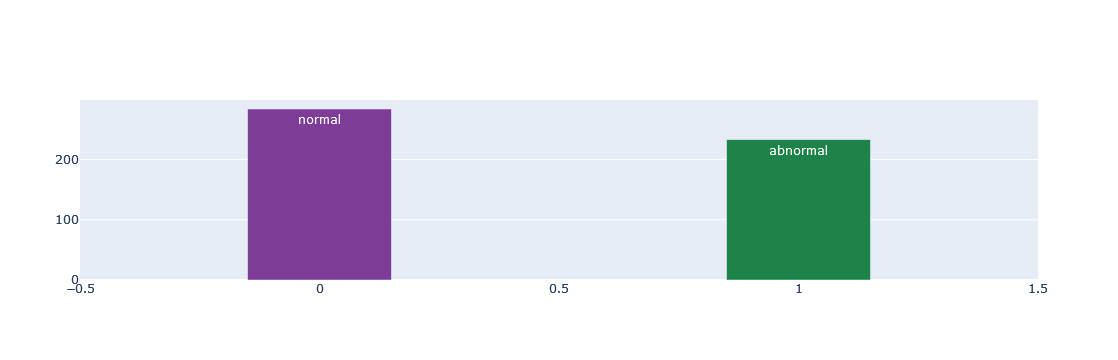

In [20]:
# use plotly go to find number of normal and abnormal images
indx = dataset['Label'].value_counts().index
vals = dataset['Label'].value_counts().values

fig = go.Figure()

labels = ['normal', 'abnormal']

colors = ['#7d3c98' if label == 'normal' else '#1d8348' for label in labels]

fig.add_trace(go.Bar(x = indx, y = vals, width = 0.3, marker_color = colors, text = labels, legendgroup = 'group'))
fig.update_layout(title = '', xaxis_title = '', yaxis_title = '', height = 500)
fig.show()

## ANN Implementation

In [34]:
# separate data into dependent and independent
X = dataset.iloc[ : , : -1]
y = dataset.iloc[ : , -1]
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [35]:
# sclae values around 1
scaler = StandardScaler()

x = scaler.fit_transform(X)

In [37]:
len(X.columns)

9

In [38]:
# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

In [39]:
# declare model
model = Sequential()

# input layer
model.add(Dense(units = len(X.columns), input_dim = len(X.columns), input_shape = (len(X.columns), ), kernel_initializer = 'uniform'))

# first hidden layer
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))

# second hidden layer
model.add(Dense(units = 128, activation = 'tanh', kernel_initializer = 'uniform'))

# third hidden layer
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))

# output layer
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'uniform'))

# summary of prepared model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 9)                 90        
                                                                 
 dense_6 (Dense)             (None, 128)               1280      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34523 (134.86 KB)
Trainable params: 34523 (134.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# compile model
model.compile(optimizer = 'adam', loss = 'BinaryCrossentropy', metrics = ['accuracy'])

In [41]:
# train and fit model
model.fit(x_train, y_train, epochs = 100, batch_size = 5, validation_data = (x_test, y_test))

Epoch 1/100
93/93 [==============================] - 3s 8ms/step - loss: 0.4199 - accuracy: 0.8581 - val_loss: 0.3642 - val_accuracy: 0.8654
Epoch 2/100
93/93 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.8925 - val_loss: 0.4188 - val_accuracy: 0.8654
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 0.2782 - accuracy: 0.8839 - val_loss: 0.3626 - val_accuracy: 0.8846
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 0.2721 - accuracy: 0.8989 - val_loss: 0.3844 - val_accuracy: 0.8654
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: 0.2720 - accuracy: 0.8968 - val_loss: 0.3351 - val_accuracy: 0.8846
Epoch 6/100
93/93 [==============================] - 0s 4ms/step - loss: 0.2698 - accuracy: 0.8968 - val_loss: 0.3144 - val_accuracy: 0.8846
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: 0.2644 - accuracy: 0.8925 - val_loss: 0.3256 - val_accuracy: 0.8846
Epoch 8/100
9

In [45]:
# evaluate on training
model.evaluate(x_train, y_train)

15/15 [==============================] - 0s 4ms/step - loss: 0.2423 - accuracy: 0.9075


[0.24228884279727936, 0.9075269103050232]

In [46]:
# evaluate on testing data
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 0.3635 - accuracy: 0.9038


[0.3635345995426178, 0.9038461446762085]

In [48]:
# lets predict test data
y_pred = model.predict(x_test)
y_pred

2/2 [==============================] - 0s 0s/step


array([[0.01488278],
       [0.98533463],
       [0.00921056],
       [0.9964142 ],
       [0.6379969 ],
       [0.19946267],
       [0.05304798],
       [0.9880469 ],
       [0.07692317],
       [0.05657236],
       [0.0129848 ],
       [0.01436422],
       [0.01362884],
       [0.0650365 ],
       [0.99210835],
       [0.06718186],
       [0.991873  ],
       [0.09892967],
       [0.49087965],
       [0.0096535 ],
       [0.05750876],
       [0.50526416],
       [0.01676464],
       [0.00756323],
       [0.02942032],
       [0.12577   ],
       [0.965034  ],
       [0.9906223 ],
       [0.02183738],
       [0.9853407 ],
       [0.64142424],
       [0.21266912],
       [0.42031926],
       [0.02387681],
       [0.98795307],
       [0.02627656],
       [0.78160816],
       [0.00922305],
       [0.9941123 ],
       [0.9584625 ],
       [0.98533463],
       [0.00629087],
       [0.03333048],
       [0.21821809],
       [0.01541556],
       [0.03120015],
       [0.59380966],
       [0.989

In [49]:
# declare a list
ypred = []
for i in y_pred:
    if (i < 0.5):
        ypred.append(0)
    else:
        ypred.append(1)
ypred

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0]

In [52]:
# accuracy for unseen data
accuracy_score(y_test, ypred)

0.9038461538461539

In [44]:
# save the model using pickle
with open('annmodel.pkl', 'wb') as file:
    pickle.dump(model, file)

In [85]:
# now load model and test it on new images
with open('annmodel.pkl', 'rb') as file:
    model = pickle.load(file)

# now read image
image = io.imread(r"C:\Users\Arfan Shah\Downloads\gwbz3fsgp8-2\Normal Person ECG Images (284x12=3408)\Normal(258).jpg")

# convert into array
image_array = np.asarray(image)

# split into three channels
red = image_array[:, :, 0]
green = image_array[:, :, 1]
blue = image_array[:, :, 2]

# extract faetures for red channel
Red_Mean = np.mean(red)
Red_Var = np.var(red)
Red_Std = math.sqrt(Red_Var)

# extract green channel features
Green_Mean = np.mean(green)
Green_Var = np.var(green)
Green_Std = math.sqrt(Green_Var)

# extract blue channel features
Blue_Mean = np.mean(blue)
Blue_Var = np.var(blue)
Blue_Std = math.sqrt(Blue_Var)

# make a list
list = [Red_Mean, Red_Var, Red_Std, Green_Mean, Green_Var, Green_Std, Blue_Mean, Blue_Var, Blue_Std]

# convert into array
array = np.asarray(list)

# reshape array
list = array.reshape(-1, 1)
print(list)

# normalise this list
scaler = StandardScaler()
lis = scaler.fit_transform(list)

print(lis)

# reshape array again
new_list = lis.reshape(1, -1)

prediction = model.predict(new_list)

prediction

[[ 243.88840951]
 [1824.18422168]
 [  42.7104697 ]
 [ 241.55664423]
 [1912.52433196]
 [  43.7324174 ]
 [ 241.24620103]
 [1902.01929253]
 [  43.61214616]]
[[-0.5805549 ]
 [ 1.33947247]
 [-0.82498202]
 [-0.58338795]
 [ 1.44680392]
 [-0.82374038]
 [-0.58376513]
 [ 1.43404051]
 [-0.8238865 ]]
1/1 [==============================] - 0s 157ms/step


array([[0.97840565]], dtype=float32)

In [83]:
# find disease
if (prediction < 0.5):
    print("Wow! Your ECG is NORMAL!")
else:
    print("Ahh! Your ECG is ABNORMAL! ")

Ahh! Your ECG is ABNORMAL! 
